In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Perceptron Model

In [14]:
class Perceptron:
    """
    Perceptron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset (epoch).
    random_state : int
        Random number generator seed for random weight initialization.
    
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting.
    errors_ : list
        Number of misclassifications (updates) in each epoch.
    
    Algorithm:
        1. Initialization weight, in this case using random normal
        2. For each data training (until maximum epoch is approached):
            - Calculate output
            - Calculate error
            - Update the weight
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        -----------
        X : array-like, shape = [n_records, n_features]
            Training vectors, where n_records is the number of records
            and n_features is the number of features.
        y : array-like, shape = [n_records]
            Target values.
            
        Returns
        ---------
        self : object
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size= 1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (target - self.predict(xi))
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.0, 1, -1)
    

In [20]:
import seaborn as sns

# Load Iris dataset
df = sns.load_dataset('iris')

# Display the first few rows of the dataset
df.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


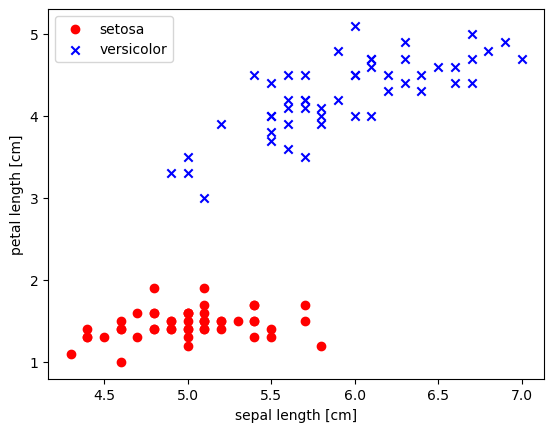

In [39]:
# Select setos and versicolor
y = df.iloc[:100, 4].values
y = np.where(y == 'setosa', -1, 1)

# Extract sepal length and petal length
X = df.iloc[:100, [0, 2]].values

# Plot data
plt.scatter(X[:50, 0], X[:50, 1],
            color='red', marker='o', label='setosa')
plt.scatter(X[50:100, 0], X[50:100, 1],
            color='blue', marker='x', label='versicolor')
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

NOTES:
- In this two-dimensional feature subspace, we can see that a linear decision boundary should be sufficient to separate Setosa from Versicolor flowers.

- Thus a linear classifier such as the perceptron should be able to classify the flowers in this dataset perfectly.

- Please note that we applied one-vs-all (OvA). Because the algorithms is applied for binary output, so we have to manipulate the data from multiple into binary output.

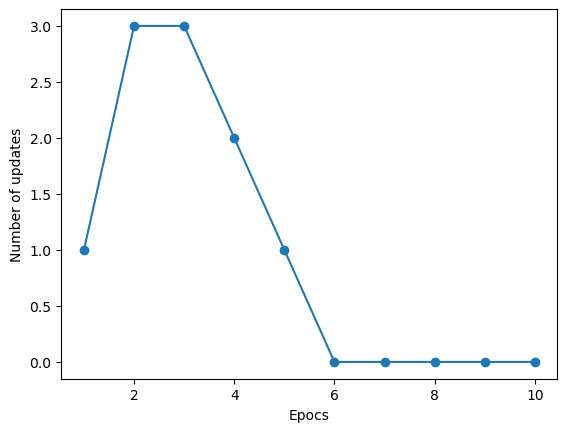

In [40]:
# Applied Perceptron Model

ppn = Perceptron(eta=0.1, n_iter=10)
ppn.fit(X, y)

# Preceding plot
plt.plot(range(1, len(ppn.errors_) + 1),
         ppn.errors_, marker='o')
plt.xlabel('Epocs')
plt.ylabel('Number of updates')
plt.show()

Notes: 
- As we can see in the preceding plot, our perceptron converged after the sixth epoch and should now be able to classify the training examples perfectly.

In [41]:
# Plot result

from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y, classifier, resolution=0.02):
    # Set up marker generator and color map
    markers = ('s', 'x', 'o', '^', 'v') # Define number of markers
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan') # Define number of colors
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                         np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    # plot class examples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0],
                    y=X[y == cl, 1],
                    alpha=0.8,
                    c=colors[idx],
                    marker=markers[idx],
                    label=cl,
                    edgecolor='black')
        

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_4796\3896352161.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


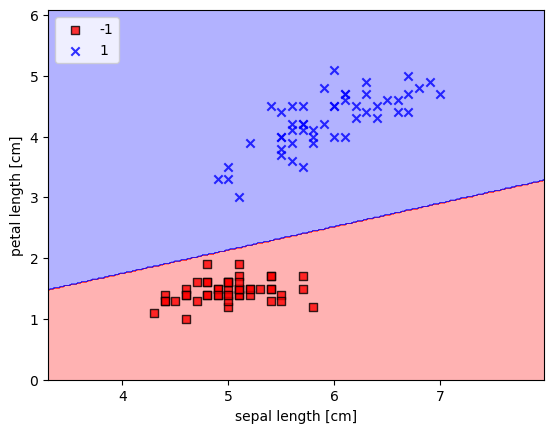

In [42]:
plot_decision_regions(X, y, classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upper left')
plt.show()

As we can see, the perceptron learned a decision boundary that is able to classify all flower examples in the Iris training subset perfectly.

# ADaptive LInear NEuron (ADALINE) Model


In [43]:
class AdalineGD:
    """
    ADaptive LInear NEuron classifier.
    
    Parameters
    -----------
    eta : float
        Learning rate (between 0.0 and 1.0)
    n_iter : int
        Passes over the training dataset (epochs)
    random_state : int
        Random number generator seed for random weight initialization
        
    Attributes
    -----------
    w_ : 1d-array
        Weights after fitting
    cost_ : list
        Sum-of-squares cost function value in each epoch
        
    Algorithm
    ----------
    1. Initializtion weights, in this case using random normal
    2. For each epoch:
        - Calculate net input function
        - Calculate activation function
        - Update weights
        - Store the cost function result each epoch.
    """
    
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state
    
    def fit(self, X, y):
        """
        Fit training data.
        
        Parameters
        -----------
        X : array-like, shape = [n_records, n_features]
            Training vectors, where n_records is the number of records
            and n_features is the number of features.
        y : array-like, shape = [n_records]
            Target values.
            
        Returns
        ----------
        self : object
        
        """
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01,
                             size=1 + X.shape[1])
        self.cost_ = []
        
        for _ in range(self.n_iter):
            net_input = self.net_input(X)
            result = self.activation(net_input)
            errors = (y - result)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        """Compute linear activation"""
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0,
                       1, -1)
    

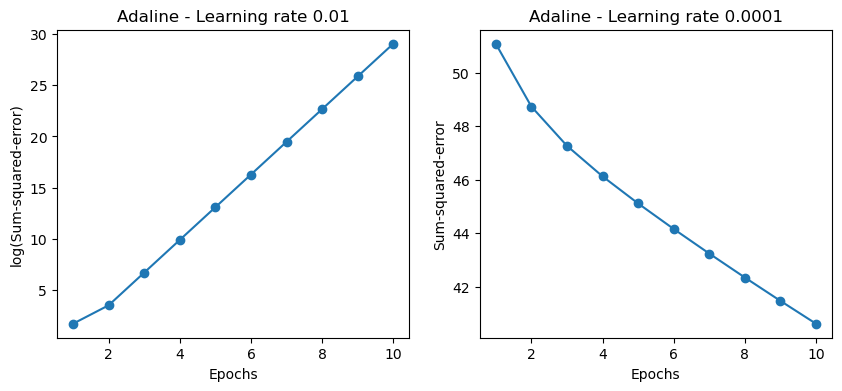

In [45]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
ada1 = AdalineGD(n_iter=10, eta=0.01).fit(X, y)
ax[0].plot(range(1, len(ada1.cost_) + 1),
           np.log10(ada1.cost_), marker='o')
ax[0].set_xlabel('Epochs')
ax[0].set_ylabel('log(Sum-squared-error)')
ax[0].set_title('Adaline - Learning rate 0.01')

ada2 = AdalineGD(n_iter=10, eta=0.0001).fit(X, y)
ax[1].plot(range(1, len(ada2.cost_) + 1),
           ada2.cost_, marker='o')
ax[1].set_xlabel('Epochs')
ax[1].set_ylabel('Sum-squared-error')
ax[1].set_title('Adaline - Learning rate 0.0001')
plt.show()

NOTE:
- The left chart (learning rate is too large):
> Instead of minimizing the cost function, the error becomes larger in every epoch, because we *overshoot* the global minimum.


- The right chart (learning rate too low):
> The algorithm learning is too small, so it would **require a very large number of epochs** to converge to the global cost minimum.

# Improving gradient descent through feature scaling

> Many machine learning algorithms require feature scaling that can help gradient descent learning to converge more quickly.

> **When features have different scales**, the contours of the cost function can be elongated, **leading to skewed gradients**. This can cause gradient descent to oscillate or take longer paths to converge. **Feature scaling transforms the contours to be more circular**, ensuring that **the gradient points more directly towards the minimum**.

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_4796\3896352161.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


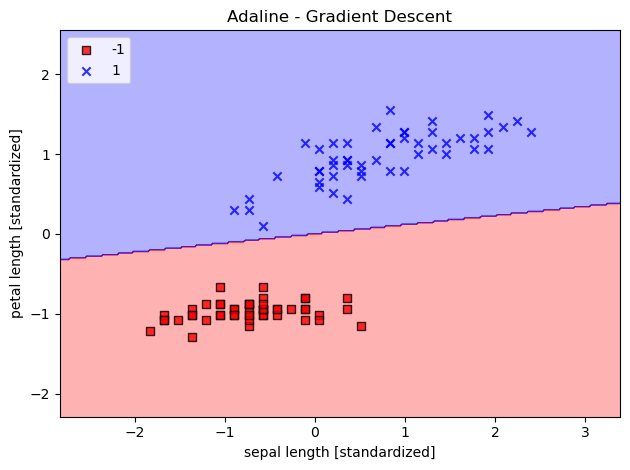

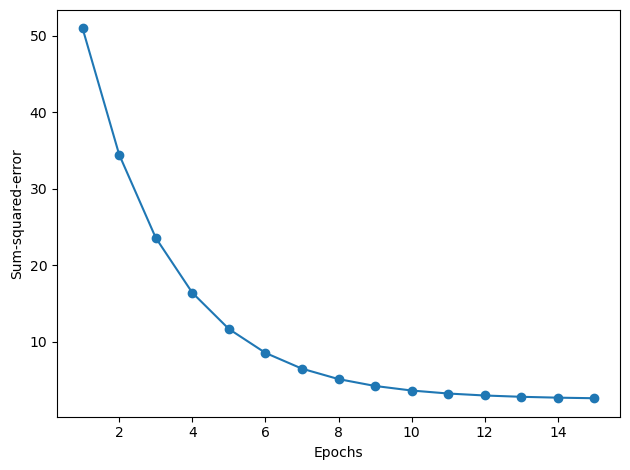

In [46]:
X_std = np.copy(X)
X_std[:, 0] = (X[:, 0] - X[:, 0].mean()) / X[:, 0].std()
X_std[:, 1] = (X[:, 1] - X[:, 1].mean()) / X[:, 1].std()

ada_gd = AdalineGD(n_iter=15, eta=0.01)
ada_gd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_gd)
plt.title('Adaline - Gradient Descent')
plt.xlabel("sepal length [standardized]")
plt.ylabel("petal length [standardized]")
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

plt.plot(range(1, len(ada_gd.cost_) + 1),
         ada_gd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel("Sum-squared-error")
plt.tight_layout()
plt.show()

NOTE: 
- As we can see in the plot, Adaline has now converged after training on the stardized features using learning rate 0,01. In previous example, learning rate 0.01 failed to achieve convergent.

# Large-scale Machine Learning and Stochastic Gradient Descent

In [51]:
class AdalineSGD:
    """
      Adaline SGD Classifier Model

      Parameters
      ------------
      eta : float (default: 0.01)
          Learning rate (between 0.0 and 1.0)
      n_iter : int (default: 10)
          Passes over the training dataset (epochs).
      shuffle : bool (default: True)
          Shuffle training data every epoch if True to prevent cycles.
      random_state : int
          Random number generator seed for random weight

      Attributes
      ------------
      w_ : 1d-array
          Weights after fitting.
      cost_ : list
          Sum-of-squares cost function value averaged over all
          training examples in each epoch
    """
    def __init__(self, eta=0.01, n_iter=10,
                shuffle=True, random_state=None):
        self.eta = eta
        self.n_iter = n_iter
        self.w_initialized = False
        self.shuffle = shuffle
        self.random_state = random_state
    
    def net_input(self, X):
        """Calculate net input"""
        return np.dot(X, self.w_[1:]) + self.w_[0]
    
    def activation(self, X):
        return X
    
    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.activation(self.net_input(X)) >= 0.0,
                    1, -1)
    def _initialize_weights(self, m):
        """Initialize weights to small random numbers"""
        self.rgen = np.random.RandomState(self.random_state)
        self.w_ = self.rgen.normal(loc=0.0, scale=0.01,
                               size = 1 + m)
        self.w_initialized = True
    
    def _shuffle(self, X, y):
        """Shuffle training data"""
        r = self.rgen.permutation(len(y))
        return X[r], y[r]
    
    def _update_weights(self, xi, target):
        """Apply Adaline learning rule to update the weights"""
        result = self.activation(self.net_input(xi))
        error = (target - result)
        self.w_[1:] += self.eta * xi.dot(error)
        self.w_[0] += self.eta * error
        cost = 0.5 * error**2
        return cost
    
    def fit(self, X, y):
        """ Fit training data.

        Parameters
        ----------
        X: {array-like}, shape = [n_examples, n_features]
           Training vectors, where n_examples is the number of
           examples and n_features is the number of features.
        Y: array-like, shape = [n_examples]
           Target values.
        """
        self._initialize_weights(X.shape[1])
        self.cost_ = [] # Store average cost result each epoch
        for i in range(self.n_iter):
            if self.shuffle:
                X, y = self._shuffle(X, y) # If the training data before each epoch is shuffled.
                                       # To avoid repetitive cycles when we are optimizing the cost function
            cost = []
            for xi, target in zip(X, y):
                cost.append(self._update_weights(xi, target))
            avg_cost = sum(cost) / len(y)
            self.cost_.append(avg_cost)
        return self     

C:\Users\Baha Tegar\AppData\Local\Temp\ipykernel_4796\3896352161.py:23: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(x=X[y == cl, 0],


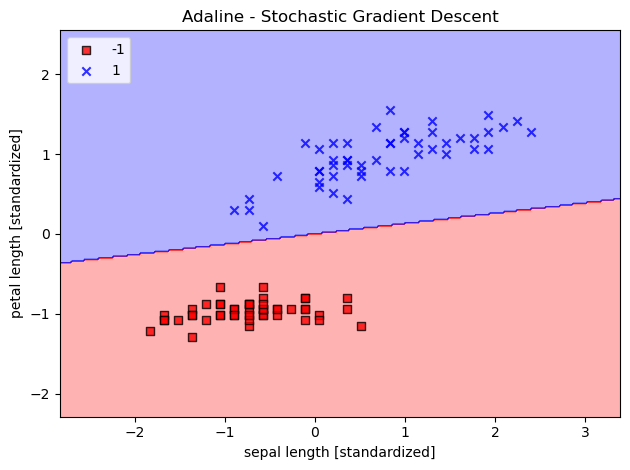

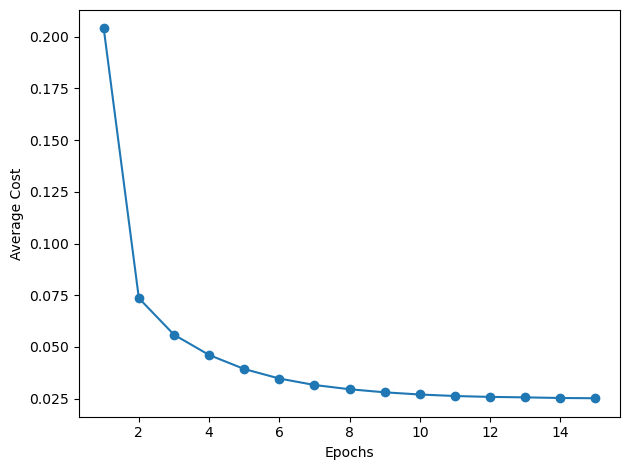

In [52]:
ada_sgd = AdalineSGD(n_iter=15, eta=0.01, random_state=1)
ada_sgd.fit(X_std, y)

plot_decision_regions(X_std, y, classifier=ada_sgd)
plt.title("Adaline - Stochastic Gradient Descent")
plt.xlabel('sepal length [standardized]')
plt.ylabel('petal length [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()
plt.plot(range(1, len(ada_sgd.cost_) + 1),
         ada_sgd.cost_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Average Cost')
plt.tight_layout()
plt.show()

NOTE:
- As we can see, the average cost goes down pretty quickly (already convergen at epochs 3-4 but gradient descent convergen at 7-9), and the final decision boundary after 15 epochs looks similar to the batch gradient descent Adaline.

- If we want to update our model, we could simply call the partial_fit method on inidividual training examples [for instance ada_sgd.partial_fit(X_std[0, :], y[0]) ]